# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [3]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px

In [4]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [5]:
# let's have a look
print(spaceship.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [6]:
print(spaceship.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [7]:
spaceship.shape

(8693, 14)

**Check for data types**

In [8]:
#checking for null values
spaceship.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
# proportion of missing / Nan
spaceship.isnull().sum() /len(spaceship) * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [12]:
spaceship.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

**Check for missing values**

In [13]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value.

In [15]:
spaceship.shape

(6606, 14)

In [14]:
#Let's delete all the rows with at least one missing value:
spaceship.dropna(inplace = True)

In [16]:
spaceship.shape

(6606, 14)

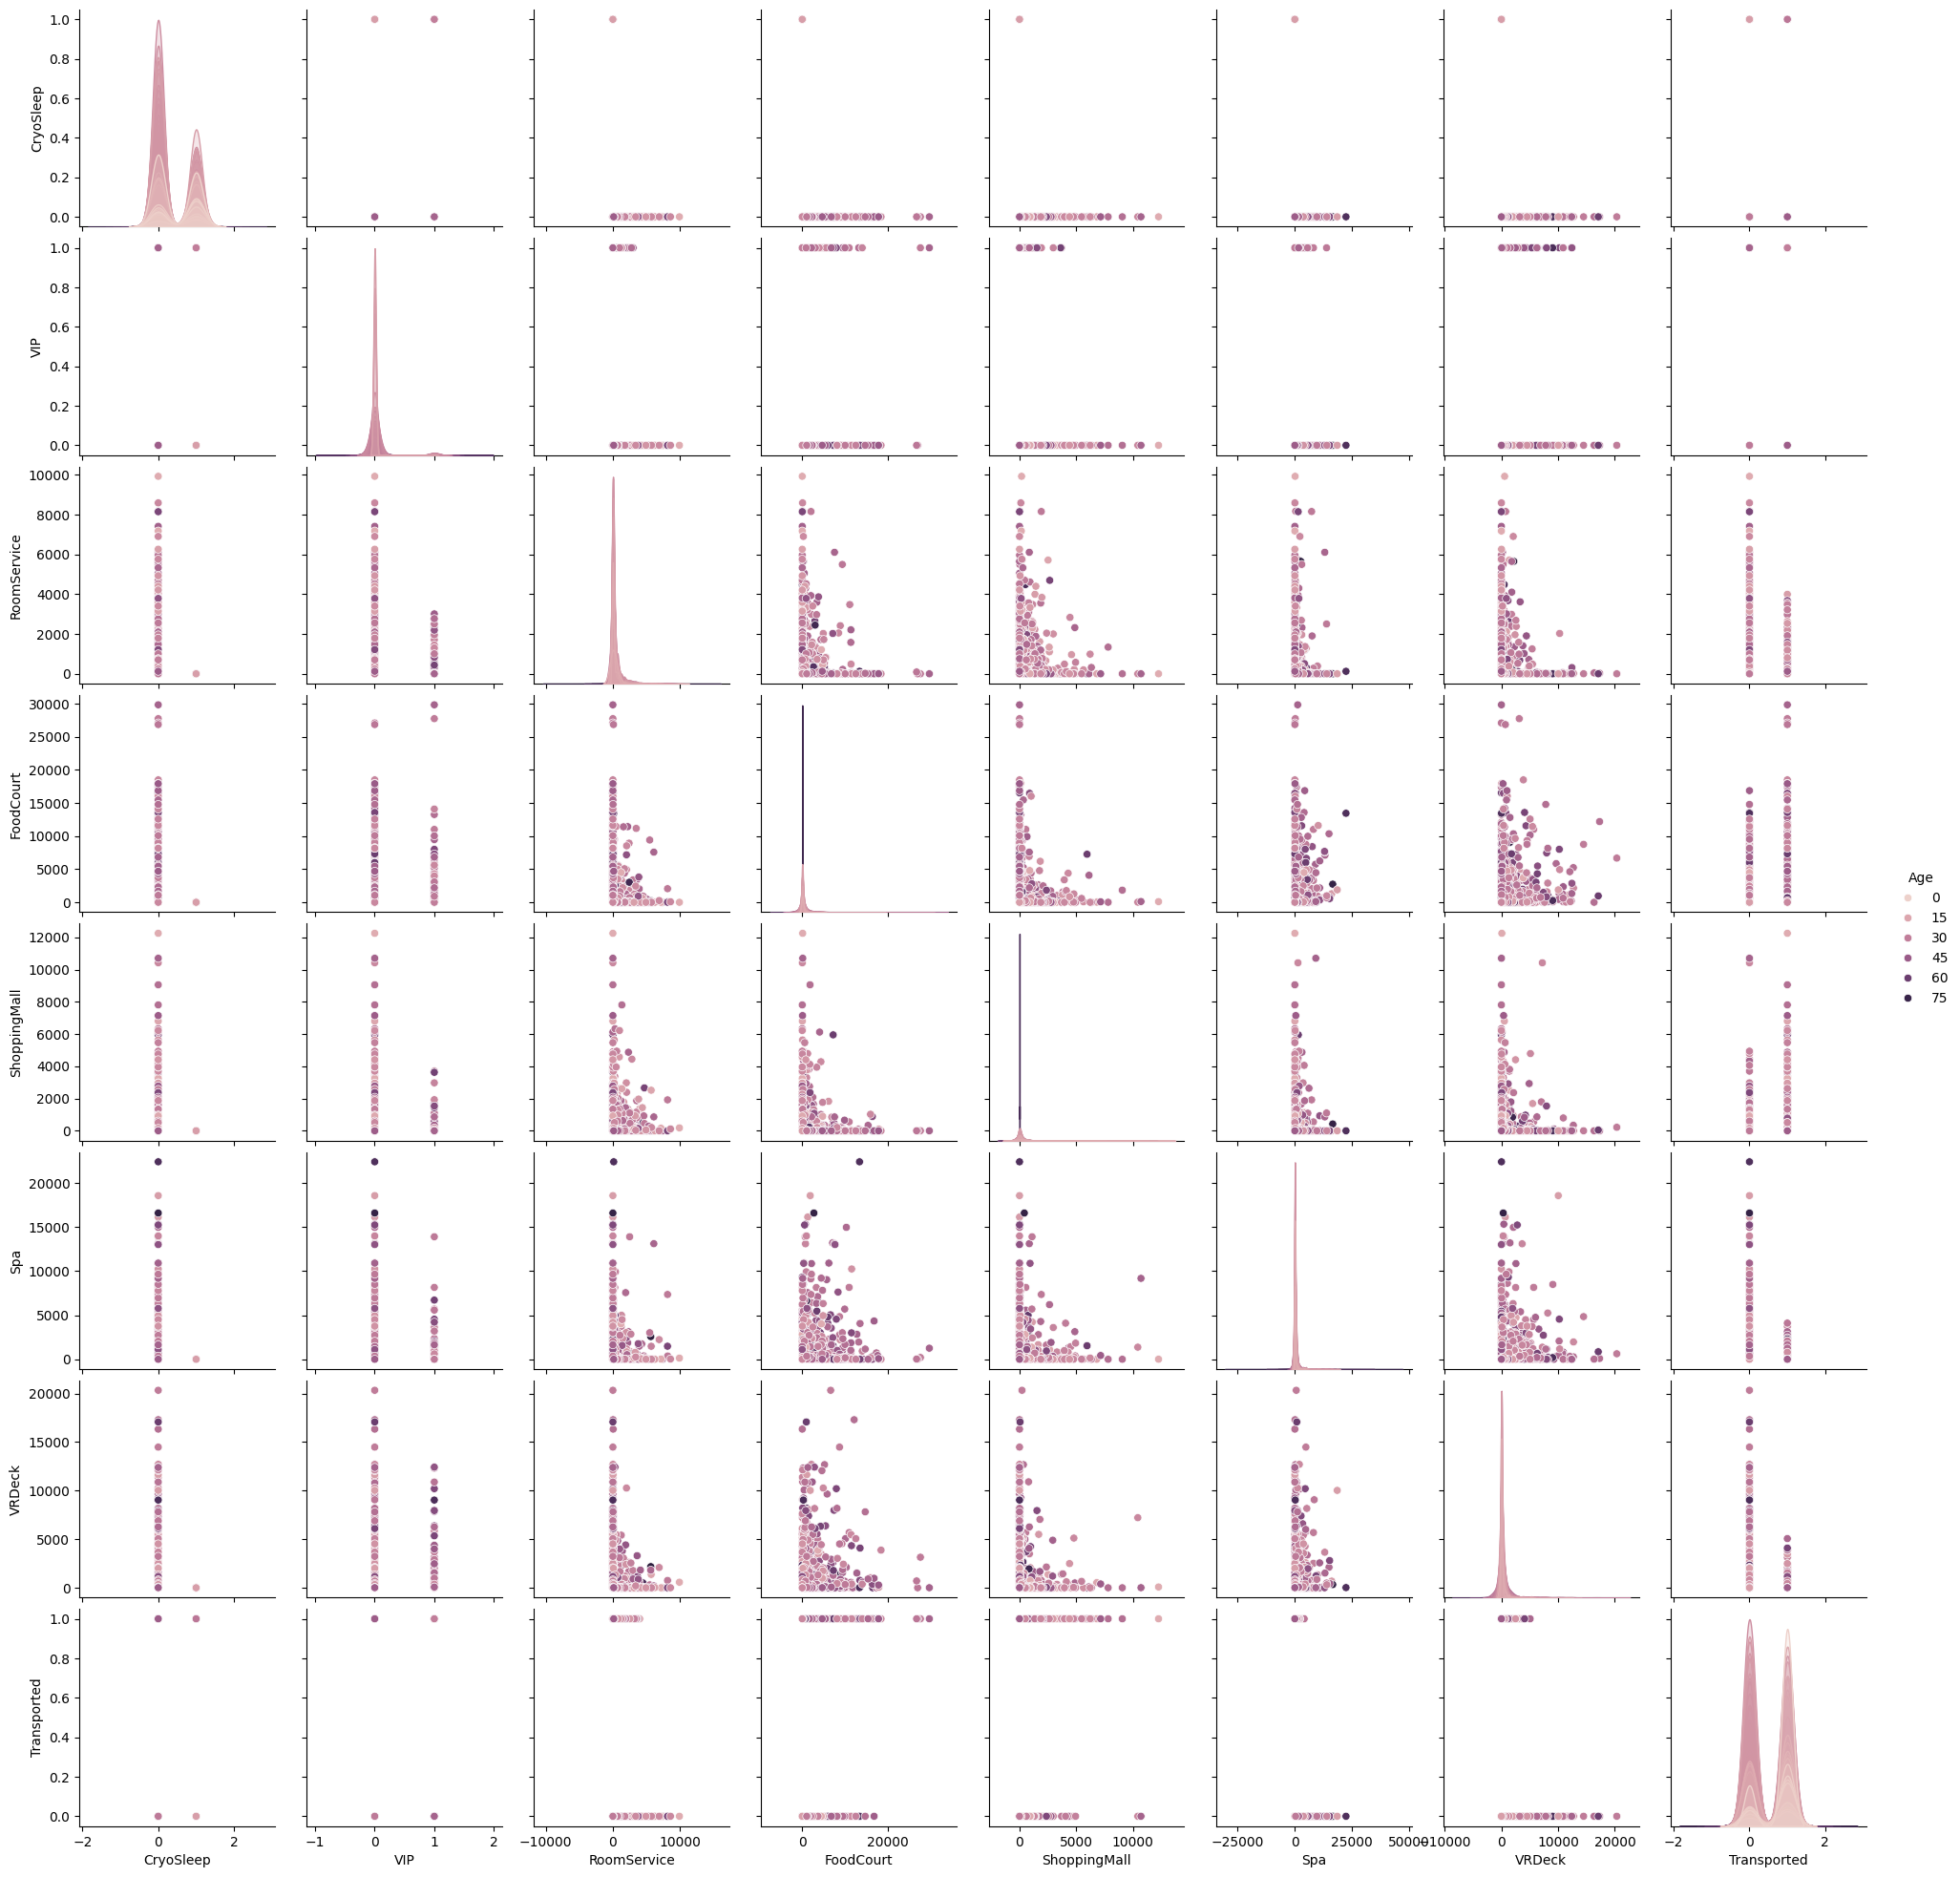

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(spaceship, hue="Age")
plt.show()

**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [18]:
#what are our columns types :
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [19]:
spaceship.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [36]:
import numpy as np
for column in spaceship.columns:
  if spaceship[column].dtype == np.float64:
    spaceship[column] = spaceship[column].astype(int)

In [37]:
spaceship.dtypes

PassengerId         object
HomePlanet          object
CryoSleep           object
Cabin               object
Destination         object
Age                  int64
VIP                 object
RoomService          int64
FoodCourt            int64
ShoppingMall         int64
Spa                  int64
VRDeck               int64
Name                object
Transported           bool
Age_int              int64
CryoSleep_int        int64
VIP_int              int64
Transported_int      int64
RoomService_int      int64
ShoppingMall_int     int64
Spa_int              int64
VRDeck_int           int64
FoodCourt_int        int64
dtype: object

In [22]:
# PassengerID should be an integer, CryoSleep being 0 or 1, Age an integer,VIP 0 or 1,  Transported 0 or 1
spaceship['CryoSleep_int'] = spaceship['CryoSleep'].astype(int)
spaceship['VIP_int'] = spaceship['VIP'].astype(int)
spaceship['Transported_int'] = spaceship['Transported'].astype(int)

In [23]:
spaceship['RoomService_int'] = spaceship['RoomService'].astype(int)
spaceship['ShoppingMall_int'] = spaceship['ShoppingMall'].astype(int)
spaceship['Spa_int'] = spaceship['Spa'].astype(int)
spaceship['VRDeck_int'] = spaceship['VRDeck'].astype(int)
spaceship['FoodCourt_int'] = spaceship['FoodCourt'].astype(int)


In [24]:
spaceship['Age_int'] = spaceship['Age'].astype(int)

In [25]:
# let's define our features:
features = spaceship[["RoomService_int", "FoodCourt_int", "ShoppingMall_int", "Spa_int", "VRDeck_int", ]]
features

,RoomService_int,FoodCourt_int,ShoppingMall_int,Spa_int,VRDeck_int
0,0,0,0,0,0
1,109,9,25,549,44
2,43,3576,0,6715,49
3,0,1283,371,3329,193
4,303,70,151,565,2
...,...,...,...,...,...
8688,0,6819,0,1643,74
8689,0,0,0,0,0
8690,0,0,1872,1,0
8691,0,1049,0,353,3235


And also lets define our target.

In [55]:
#your code here
target = spaceship[["Transported"]]
target

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
X_train.head()

,RoomService_int,FoodCourt_int,ShoppingMall_int,Spa_int,VRDeck_int
3432,0,0,0,0,0
7312,0,0,0,0,0
2042,0,236,0,1149,0
4999,13,0,565,367,1
5755,0,0,0,0,0


In [59]:
y_train.head()

,Transported
3432,False
7312,True
2042,False
4999,False
5755,True


' Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [67]:
#your code here
# using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier


In [61]:
spaceship.nunique()

PassengerId         6606
HomePlanet             3
CryoSleep              2
Cabin               5305
Destination            3
Age                   80
VIP                    2
RoomService         1093
FoodCourt           1293
ShoppingMall         984
Spa                 1143
VRDeck              1106
Name                6590
Transported            2
Age_int               80
CryoSleep_int          2
VIP_int                2
Transported_int        2
RoomService_int     1093
ShoppingMall_int     984
Spa_int             1143
VRDeck_int          1106
FoodCourt_int       1293
dtype: int64

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsClassifier(n_neighbors = 10)

Fit the model to your data.

In [70]:
# Training the model
knn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

Evaluate your model.

In [71]:
pred = knn.predict(X_test)
pred

array([ True,  True,  True, ...,  True,  True,  True])

In [72]:
y_test.values

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [73]:
knn.score(X_test, y_test) #accuracy ? #ran away from accuracy !! (LT advice ;)

0.783661119515885

In [79]:
from sklearn.metrics import confusion_matrix

# already stated above
pred = knn.predict(X_test)
pred

#confusion matrix
# sns.heatmap(confusion_matrix(y_test, pred), annot = True)
print(confusion_matrix(y_test, pred))

[[487 174]
 [112 549]]


In [82]:
from sklearn.metrics import precision_score,recall_score

print(precision_score(y_test, pred))
print(recall_score(y_test, pred))

0.7593360995850622
0.8305597579425114


signification / interpretation: FP > FN - we want to minimize the number of false positive

In this specific context, those numbers aren't that bad

In [ ]:
# mean-squared error --> for regression


In [74]:
from sklearn.metrics import mean_squared_error

#RMSE
RMSE = mean_squared_error(y_test.values, pred, squared = False)
RMSE

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [ ]:
target_range = target.max() - target.min()
target_range

In [ ]:
RMSE / target_range

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, pred), annot = True)

**Congratulations, you have just developed your first Machine Learning model!**